<a href="https://colab.research.google.com/github/farimaahchz/07-/blob/main/07_CO2_03_best_price_non__fossil_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I- Overview**

---



finding the answer to the following three questions :

1- What is the biggest predictor of a large CO2 output per capita of a country?

2- Which countries are making the biggest strides in decreasing CO2 output?

**3- Which non-fossil fuel energy technology will have the best price in the future?**


# **II- Data and model**

---



To determine which non-fossil fuel energy technology will have the best price in the future, To achieve this, I will use data from https://ourworldindata.org/ and conduct a linear regression analysis on different non-fossil fuel energy technologies. The dataset provides information on the average cost per unit of energy generated by new power plants over their lifetime. The cost is measured in US dollars per kilowatt-hour and is adjusted for inflation. By performing this analysis, we can identify the non-fossil fuel technology with the best price in the future.

## **A. Importig necessary modules**


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.colab.data_table

## **B. importing the datasets**

---



In [2]:
#importing the dataset from github into the notebook
df_price = pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA_CO2_best_price_fuel/01-levelized-cost-of-energy.csv')
df_price

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.207732
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.185732
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.163131
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.152881


## **C. General preparation and cleaning of data**

---

To organize our dataset, I drop the extra columns and rename some of them.


In [3]:
df_price.columns
#dropping the extra columns with irrelevnt information
df_price.drop(columns = ['Code'], inplace = True)

#renaming columns
df_price.rename(columns = {'Bioenergy levelized cost of energy':'Bioenergy', 'Geothermal levelized cost of energy':'Geothermal', 'Offshore wind levelized cost of energy': 'Offshore_wind', 'Solar photovoltaic levelized cost of energy': 'Solar_photovoltaic', 'Concentrated solar power levelized cost of energy': 'Concentrated_solar_power', 'Hydropower levelized cost of energy': 'Hydropower', 'Onshore wind levelized cost of energy': 'Onshore_wind' }, inplace = True)


# **III- Analysing data**

---

To analyze the data and find the answer, I will start by narrowing down the dataset to include only the data for the "World" entity since our focus is on global level.

Next, I will define a function to calculate the linear regression for each energy type. By using scatter plots and Numpy I can estimate the future prices and incorporate them into the plot to identify which prices are decreasing faster.

This approach will help us to findout which non-fossil fuel energy may potentially offer the best price in the future.


In [4]:
#filtering data on Entity == World, as we do not need the nations for our results
df_price = df_price.loc[df_price["Entity"]== 'World']
#df_price = df_price.sort_values('Year')
df_price


,Entity,Year,Bioenergy,Geothermal,Offshore_wind,Solar_photovoltaic,Concentrated_solar_power,Hydropower,Onshore_wind
447,World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
448,World,2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
449,World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [5]:
#df_price.columns
#defining the non fossil energy types
energy_types = df_price.columns[2:]
energy_types

Index(['Bioenergy', 'Geothermal', 'Offshore_wind', 'Solar_photovoltaic',
       'Concentrated_solar_power', 'Hydropower', 'Onshore_wind'],
      dtype='object')

In [6]:
#defining a function which takes the dataframe and energy_type as input and filters the data for the specifc type of energy
#returns the slope and intercept for the linear regression for the energy source using np.polyfit


In [7]:
def estimate_rate_price(df_price, energy_type):
    # Filter data for the specific energy source
    if energy_type in df_price:
        energy_data = df_price[['Year', energy_type]].dropna()

        # Estimate the slope and intercept
        slope, intercept = np.polyfit(energy_data['Year'], energy_data[energy_type], 1)

        return slope, intercept
    else:
        return None, None

In [8]:
#estimating the price price for the next 20 years
years_to_estimate = 20

In [9]:
#making a loop which takes each energy and calcute the slope, linear regresion and make a plot for them by using 'estimate_rate_price' function
#then I use the plt.scatter to estimate the price for the future as well

### **01. Plot**

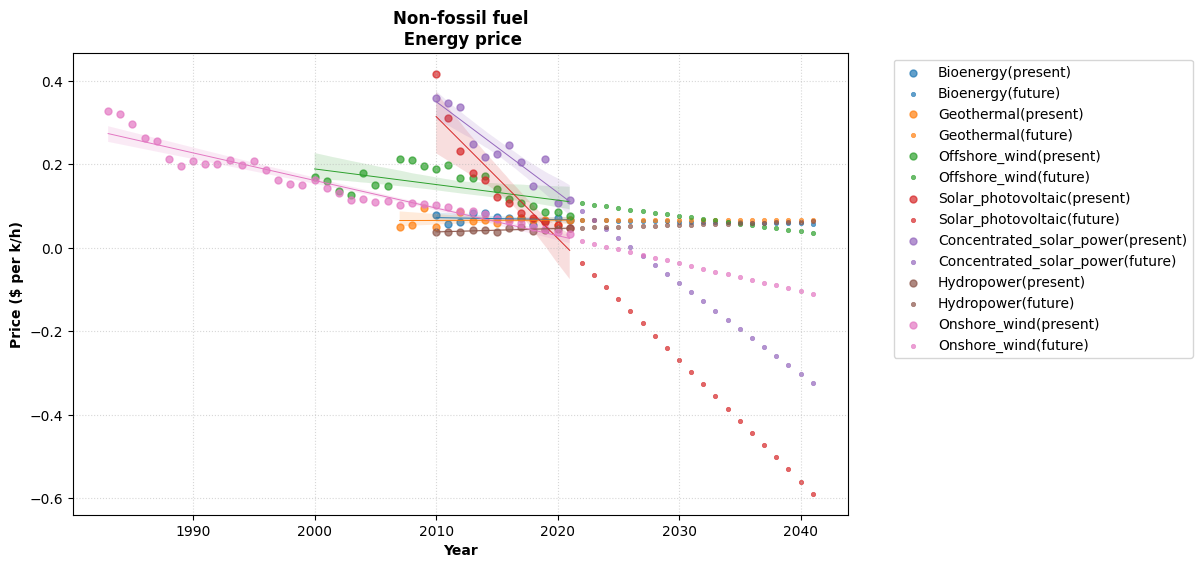

In [10]:
#visualizing the plot

plt.figure(figsize=(10, 6))

# Plot all the regression lines and scatter plots for future and present
for energy_type in energy_types:
    # Get the slope and intercept for the regression line
    slope, intercept = estimate_rate_price(df_price, energy_type)

    if slope is not None and intercept is not None:
        # calculating price
        future_years = np.arange(df_price['Year'].max() + 1, df_price['Year'].max() + years_to_estimate + 1)
        #past_years = np.arange(df_price['Year'].min() - years_to_estimate, df_price['Year'].min())

        future_prices = future_years * slope + intercept
        #past_prices = past_years * slope + intercept

        # Plot the regression line for present
        sns.regplot(data=df_price, x='Year', y=energy_type, scatter_kws={'alpha': 0.7, 's': 25}, line_kws={'linewidth': .7}, label=f'{energy_type}(present)')

        # Plot the estimated price the future
        plt.scatter(future_years, future_prices, alpha=0.7, s= 10, linewidth = 0.5, label=f'{energy_type}(future)')
        #plt.scatter(past_years, past_prices, alpha=0.5, s= 10, linewidth = .5, label= f'{energy_type} (past)')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Price ($ per k/h)', fontweight='bold')
plt.title('Non-fossil fuel\n Energy price', fontweight='bold')
plt.grid(linestyle='dotted', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## **02. Results**

As observed in the plot, the prices of ***'Solar Photovoltaic'*** and ***'Concentrated Solar Power'*** have dropped at a higher pace in comparison to other sources. Based on this data, it is likely that these two technologies will have the best prices in the future. However, it's important to note that future developments and other external factors could also impact energy prices, so the prediction is not guaranteed. Nonetheless, this analysis provides valuable insights into the potential price trends for these renewable energy sources, suggesting that they could offer more competitive prices in the future if the current pace of decline continues.

# **IV- Conclusion**


---



In conclusion, the analysis of the levelized cost of energy for various non-fossil fuel technologies has provided insights into the potential price trends in the future.

The data indicates that ***'Solar Photovoltaic'*** and ***'Concentrated Solar Power'*** technologies have shown significant price drops over time, suggesting their potential for competitive pricing compared to other renewable energy sources.

While this analysis provides valuable predictions based on the current situations in world, It is essential to consider the influence of various factors and uncertainties that may affect energy prices in the future. Therefore, ongoing monitoring and assessment of energy markets will be crucial for making informed decisions regarding the adoption of sustainable and cost-effective energy sources in the future.
